# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [16]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [17]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [18]:
# Número de saudáveis, doentes e total
crosstab_sex_num = pd.crosstab(df['sex'], df['num'] > 0, margins=True)
crosstab_sex_num.columns = ['Saudaveis', 'Doentes', 'Total']
crosstab_sex_num.index = ['Female', 'Male', 'All']
crosstab_sex_num


,Saudaveis,Doentes,Total
Female,72,25,97
Male,92,114,206
All,164,139,303


In [19]:
#Media de Doentes
crosstab_sex_num['Media Doentes'] = crosstab_sex_num['Doentes'] / crosstab_sex_num['Total']
crosstab_sex_num


,Saudaveis,Doentes,Total,Media Doentes
Female,72,25,97,0.257732
Male,92,114,206,0.553398
All,164,139,303,0.458746


In [20]:
# Odds
crosstab_sex_num['Odds'] = crosstab_sex_num['Doentes'] / crosstab_sex_num['Saudaveis']
crosstab_sex_num


,Saudaveis,Doentes,Total,Media Doentes,Odds
Female,72,25,97,0.257732,0.347222
Male,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [21]:
# Odds Ratio
total_odds = crosstab_sex_num.loc['All', 'Doentes'] / crosstab_sex_num.loc['All', 'Saudaveis']
crosstab_sex_num['Odds Ratio'] = crosstab_sex_num['Odds'] / total_odds
crosstab_sex_num


,Saudaveis,Doentes,Total,Media Doentes,Odds,Odds Ratio
Female,72,25,97,0.257732,0.347222,0.409672
Male,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [22]:
# Logito (LOG(Odds))
crosstab_sex_num['Logito'] = np.log(crosstab_sex_num['Odds'])
crosstab_sex_num


,Saudaveis,Doentes,Total,Media Doentes,Odds,Odds Ratio,Logito
Female,72,25,97,0.257732,0.347222,0.409672,-1.057790
Male,92,114,206,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [23]:
# Weight of Evidence (WOE)
crosstab_sex_num['WOE'] = np.log(crosstab_sex_num['Odds Ratio'])
crosstab_sex_num


,Saudaveis,Doentes,Total,Media Doentes,Odds,Odds Ratio,Logito,WOE
Female,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
Male,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [24]:
# Categorizar a variável 'age' em 5 grupos
df['age_group'] = pd.cut(df['age'], bins=5, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])

# Número de saudáveis e doentes usando crosstab
crosstab_age_num = pd.crosstab(df['age_group'], df['num'] > 0, margins=True)
crosstab_age_num.columns = ['Saudaveis', 'Doentes', 'Total']

# Quantidade média de doentes
crosstab_age_num['Media Doentes'] = crosstab_age_num['Doentes'] / crosstab_age_num['Total']

# Calcular as odds
crosstab_age_num['Odds'] = crosstab_age_num['Doentes'] / crosstab_age_num['Saudaveis']

# Odds ratio (usando o total como referência)
total_odds = crosstab_age_num.loc['All', 'Doentes'] / crosstab_age_num.loc['All', 'Saudaveis']
crosstab_age_num['Odds Ratio'] = crosstab_age_num['Odds'] / total_odds

# Calcular o logito (LOG(Odds))
crosstab_age_num['Logito'] = np.log(crosstab_age_num['Odds'])

# Calcular o Weight of Evidence (WOE)
crosstab_age_num['WOE'] = np.log(crosstab_age_num['Odds Ratio'])

# Calcular o valor médio da variável 'age' para cada grupo
age_means = df.groupby('age_group')['age'].mean()
crosstab_age_num['Mean Age'] = age_means

crosstab_age_num


,Saudaveis,Doentes,Total,Media Doentes,Odds,Odds Ratio,Logito,WOE,Mean Age
age_group,,,,,,,,,
Group 1,8,3,11,0.272727,0.375000,0.442446,-0.980829,-0.815437,35.181818
Group 2,50,21,71,0.295775,0.420000,0.495540,-0.867501,-0.702108,43.704225
Group 3,56,41,97,0.422680,0.732143,0.863823,-0.311780,-0.146387,53.567010
Group 4,40,67,107,0.626168,1.675000,1.976259,0.515813,0.681206,61.775701
Group 5,10,7,17,0.411765,0.700000,0.825899,-0.356675,-0.191282,70.529412
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

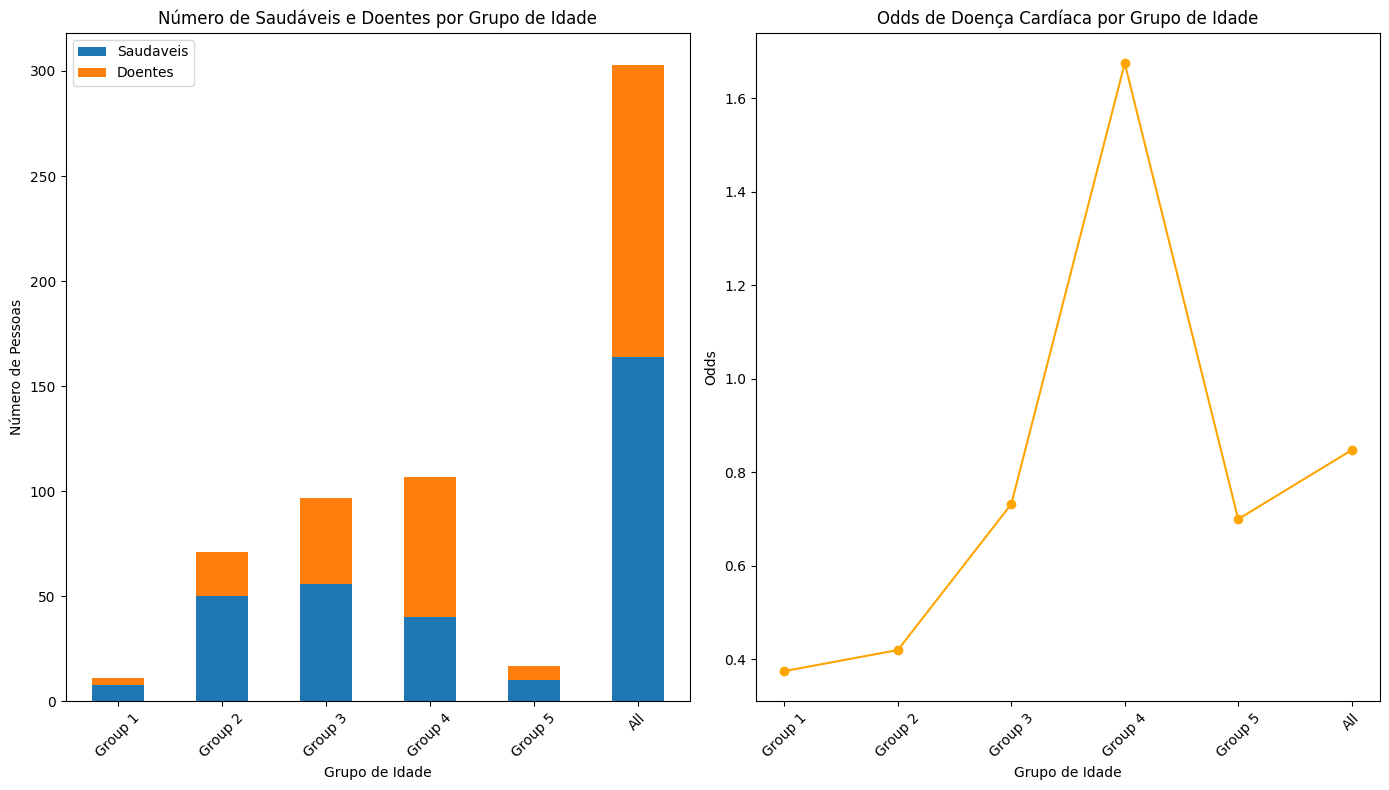

In [25]:
plt.figure(figsize=(14, 8))

# Gráfico de barras para Saudaveis e Doentes
ax1 = plt.subplot(1, 2, 1)
crosstab_age_num[['Saudaveis', 'Doentes']].plot(kind='bar', stacked=True, ax=ax1)
plt.title('Número de Saudáveis e Doentes por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=45)

# Gráfico de linha para Odds
ax2 = plt.subplot(1, 2, 2)
crosstab_age_num['Odds'].plot(kind='line', marker='o', ax=ax2, color='orange')
plt.title('Odds de Doença Cardíaca por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Odds')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()